In [1]:
import numpy as np
import meshplot as mp

/Users/nick/miniforge3/envs/meshing/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/nick/miniforge3/envs/meshing/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


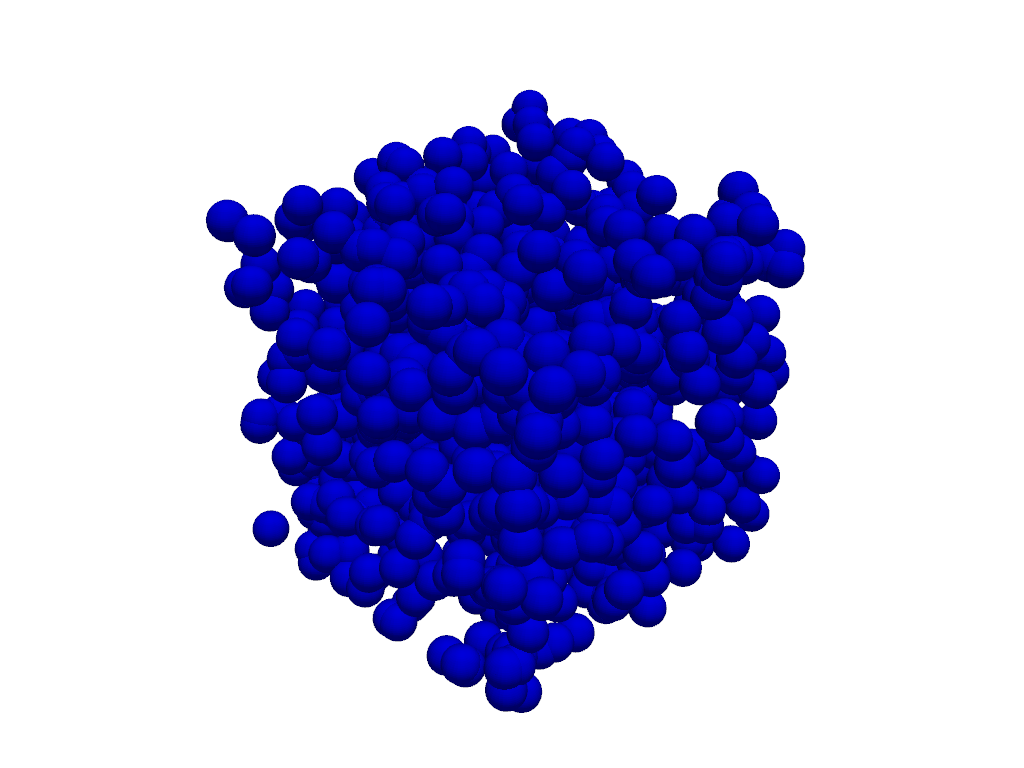

In [11]:
import pyvista as pv
import numpy as np

# Generate example point cloud
points = np.random.rand(1000, 3)

# Create a PyVista plotter
plotter = pv.Plotter()

# Add spheres for each point in the point cloud
for point in points:
    sphere = pv.Sphere(radius=0.05, center=point)
    plotter.add_mesh(sphere, color="blue")

# Show the interactive plot
plotter.show()

In [31]:
import pyvista as pv
import numpy as np
import os
import imageio
from tqdm import tqdm

# Generate example point cloud
points = np.random.rand(1000, 3)



# Directory to save frames
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Parameters for rotation
n_frames = 36  # Number of frames for 360-degree rotation (10 degrees per frame)
angle_step = 360 / n_frames

# Generate and save frames
frame_files = []
for i in tqdm(range(n_frames)):
    # Create PyVista Plotter
    plotter = pv.Plotter(off_screen=True)  # Use off_screen=True for batch rendering
    plotter.add_points(points, render_points_as_spheres=True, point_size=30, color="blue")
                   
    plotter.camera.azimuth = angle #position = (i, 0+i, 1)
    frame_path = os.path.join(output_dir, f"frame_{i:03d}.png")
    plotter.screenshot(frame_path)
    frame_files.append(frame_path)

# Close the plotter
plotter.close()

# Combine frames into a GIF
# gif_path = "rotating_point_cloud.gif"
# with imageio.get_writer(gif_path, mode="I", duration=0.1) as writer:
#     for frame_file in frame_files:
#         writer.append_data(imageio.imread(frame_file))

# print(f"GIF saved as {gif_path}")

100%|██████████| 36/36 [00:03<00:00,  9.13it/s]
